In [ ]:
"""
This code belongs to the paper:
-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 5-DOF linear structural system with tuned mass damper.
"""

# Equation discovery drift 1

In [1]:
def dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2, T):
    # ---------------------------------------------
    m1, m2,m3,m4,m5,m_d = 1, 1, 1, 1, 1, 0.1
    k1, k2,k3,k4,k5,k_d = 1000, 1500,2000,2500,3000,300
    c1, c2,c3,c4,c5,c_d = 2, 2,2,2,2,0.2
    sigma1, sigma2,sigma3,sigma4,sigma5 = 1, 1,1,1,1
    
    T = 1
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 #int(1/dt) # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    y9 = []
    y10 = []
    y_d1 = []
    y_d2= []
   
    xz1 = []
    xz2 = []
    xz3 = []
    xz4 = []
    xz5 = []
    xz6 = []
    
    xzs11 = []
    xzs22 = []
    xzs33 = []
    xzs44 = []
    xzs55 = []
    xzs66 = []
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2])
        x = x0  # Zero initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(6)
            dW1 = dW[0]
            dW2 = dW[1]
            dW3 = dW[2]
            dW4 = dW[3]
            dW5 = dW[4]
            dW6 = dW[5]
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0] \
                -(c2/m1)*(x0[1]-x0[3])-(k2/m1)*(x0[0]-x0[2])
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0]) \
                -(c3/m2)*(x0[3]-x0[5])-(k3/m2)*(x0[2]-x0[4])
            
#             a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2]) \
                -(c4/m3)*(x0[5]-x0[7])-(k4/m3)*(x0[4]-x0[6])
            
            a7 = x0[7]
            a8 = -(c4/m4)*(x0[7]-x0[5])-(k4/m4)*(x0[6]-x0[4]) \
                -(c5/m4)*(x0[7]-x0[9])-(k5/m4)*(x0[6]-x0[8])
            
            a9 = x0[9]
            a10 = -(c5/m5)*(x0[9]-x0[7])-(k5/m5)*(x0[8]-x0[6]) \
                -(c5/m5)*(x0[9]-x0[11])-(k5/m5)*(x0[8]-x0[10])
            
            a11 = x0[11]
            a12 = -(c_d/m_d)*(x0[11]-x0[9])-(k_d/m_d)*(x0[10]-x0[8])
            


            b1 = 0
            b2 = (sigma1)/m1
            b3 = 0
            b4 = (sigma2)/m2
            b5 = 0
            b6 = (sigma3)/m3
            b7 = 0
            b8 = (sigma4)/m4
            b9 = 0
            b10 = (sigma5)/m5
            b11 = 0
            b12 = 0          
            
            sol1 = x0[0] + a1*dt
            sol2 = x0[1] + a2*dt + b2*dW1
            sol3 = x0[2] + a3*dt
            sol4 = x0[3] + a4*dt + b4*dW2
            sol5 = x0[4] + a5*dt
            sol6 = x0[5] + a6*dt + b6*dW1
            sol7 = x0[6] + a7*dt
            sol8 = x0[7] + a8*dt + b8*dW2
            sol9 = x0[8] + a9*dt
            sol10 = x0[9] + a10*dt + b10*dW1
            sol11 = x0[10] + a11*dt
            sol12 = x0[11] + a12*dt + b12*dW2
            
            x0 = np.array([sol1, sol2, sol3, sol4,sol5, sol6, sol7, sol8,sol9, sol10, sol11, sol12])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        y7.append(x[6,:])
        y8.append(x[7,:])
        y9.append(x[8,:])
        y10.append(x[9,:])
        y_d1.append(x[10,:])
        y_d2.append(x[11,:])
        
        zint1 = x[1, 0:-1]
        xfinal1 = x[1, 1:] 
        xmz1 = (xfinal1 - zint1) # 'x1(t)-z1' vector
        zint2 = x[3, 0:-1]
        xfinal2 = x[3, 1:] 
        xmz2 = (xfinal2 - zint2) # 'x2(t)-z2' vector
        zint3 = x[5, 0:-1]
        xfinal3 = x[5, 1:] 
        xmz3 = (xfinal3 - zint3) # 'x1(t)-z1' vector
        zint4 = x[7, 0:-1]
        xfinal4 = x[7, 1:] 
        xmz4 = (xfinal4 - zint4) # 'x2(t)-z2' vector
        zint5 = x[9, 0:-1]
        xfinal5 = x[9, 1:] 
        xmz5 = (xfinal5 - zint5) # 'x1(t)-z1' vector
        zint6 = x[11, 0:-1]
        xfinal6 = x[11, 1:] 
        xmz6 = (xfinal6 - zint6) # 'x2(t)-z2' vector

        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        xz4.append(xmz4)
        xz5.append(xmz5)
        xz6.append(xmz6)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
        xmzsq44 = np.multiply(xmz4, xmz4)
        xzs44.append(xmzsq44)
        
        xmzsq55 = np.multiply(xmz5, xmz5)
        xzs55.append(xmzsq55)
        
        xmzsq66 = np.multiply(xmz6, xmz6)
        xzs66.append(xmzsq66)
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    xz4 = pow(dt,-1)*np.mean(np.array(xz4), axis = 0)
    xz5 = pow(dt,-1)*np.mean(np.array(xz5), axis = 0)
    xz6 = pow(dt,-1)*np.mean(np.array(xz6), axis = 0)
    
    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0)
    xzs44 = pow(dt,-1)*np.mean(np.array(xzs44), axis = 0)
    xzs55 = pow(dt,-1)*np.mean(np.array(xzs55), axis = 0)
    xzs66 = pow(dt,-1)*np.mean(np.array(xzs66), axis = 0)
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)
    y11 = np.array(y_d1)
    y12 = np.array(y_d2)
    time = t[0:-1]
    
    return xz1, xz2,xz3, xz4,xz5, xz6, xzs11, xzs22, xzs33,xzs44, xzs55, xzs66, y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y11, y12, time


In [2]:
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 

        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            #  or,
            # ind = ind+1
            # new = np.sin(xt[i,:])
            # D = np.insert(D, ind, new, axis=1)
        # for cos(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
    # ind = ind+1
    
    # D = D[:, 0:7] 
    ind = len(D[0])
    return D, ind


In [ ]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0.1, 0, 0.01, 0,0.01, 0, 0.01, 0,0.01, 0, 0.01, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [ ]:
xdts = xdrift1
Dict = D.reshape(-1,order='F')
Dict.shape

#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    

initz0_1 = np.zeros(D.shape[1])

a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))

for i in b:
    initz0_1[i] = 1
    
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code_drift(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2_drift(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2_drift(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0)+1,1)) @ np.reshape(mu,(1,len(initz0)+1))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)

D1 = D*np.diag(1/D_std1)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code_drift(X, y, initz0, tol, verbosity)

In [ ]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])
    

# Equation discovery diffusion 1

In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [ ]:
xdts = xdiff11
Dict = D.reshape(-1,order='F')

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[3.0],[7.0],[14.0],[15.0],[26.0],[34.0],[36.0],[47.0],[68.0],[81.0],[83.0],[88.0],[90.0]]), 'Value': matlab.double([[0.9820525408403596],[0.26738609685530496],[0.023803668300224488],[739.9648396382219],[3.8468403894644503],[-1.6499334403976558],[1.249406085314805],[0.9564262479203675],[0.3762367924312346],[0.05328372324534112],[0.576697400144545],[1.4815700151052278],[0.7151636719972044],[5.485691275284859]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])

In [ ]:
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))

In [ ]:
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1

In [13]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code_diff(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    # X = stats.zscore(X, ddof = 1)         
    # X = np.c_[np.ones(len(X)),X]
    # X = np.c_[np.ones(len(X)),X]          
    # y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        # initz = np.hstack((1,initz0))  
        initz = initz0

        DS,LLcvg  = run_VB2_diff(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2_diff(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0_1
DS = Variational_Bayes_Code_diff(D, xdts, initz0, tol, verbosity)

In [17]:
mut1 = DS['wmean']
sigt = DS['wCOV']
DS['zmean'][np.where(DS['zmean']<0.5)] = 0
mut1[np.where(DS['zmean']<0.5)] = 0
DS['zmean'][np.where(np.diag(sigt)>1e-4)] = 0
mut1[np.where(np.diag(sigt)>1e-4)] = 0

<StemContainer object of 3 artists>

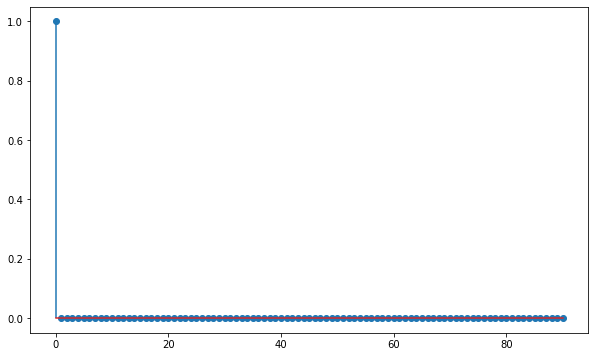

In [18]:
plt.figure(figsize=(10,6))
plt.stem(DS['zmean'])

In [19]:
DS['wmean']

array([1.00035941, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Equation discovery drift 2

In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0.1, 0, 0.01, 0,0.01, 0, 0.01, 0,0.01, 0, 0.01, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [8]:
xdts = xdrift2
Dict = D.reshape(-1,order='F')

In [10]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[25.0],[27.0],[34.0],[62.0],[64.0],[65.0]]), 'Value': matlab.double([[1499.0265118527404],[2.053366337669846],[-3502.629722381045],[-3.948223722129513],[2002.2371098780227],[2.0540342217686582],[2.759698789315928],[1.2197854573649676],[-0.13202561326866283],[-111.45680988805904],[-0.003788451715429885],[0.44281777581009085]])}


In [11]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    

initz0_1 = np.zeros(D.shape[1])

a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))

for i in b:
    initz0_1[i] = 1
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)

D1 = D*np.diag(1/D_std1)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code_drift(X, y, initz0, tol, verbosity)

1499.1425410340053
2.0865130519885366
-3501.9991339481303
-3.9445324470553795
2000.5052130947133
2.074263509357047


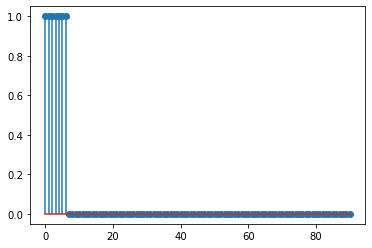

In [13]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])
    

# Equation discovery diffusion 2

In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [ ]:
xdts = xdiff22
Dict = D.reshape(-1,order='F')

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[5.0],[6.0],[9.0],[10.0],[26.0],[30.0],[33.0],[44.0],[47.0],[49.0],[51.0],[55.0],[64.0],[66.0],[68.0],[71.0],[74.0],[78.0],[85.0],[86.0],[91.0]]), 'Value': matlab.double([[0.9397741243780188],[0.49249854957567607],[-13.299760583416942],[0.2530809894436447],[15.947866375256975],[1.8598548883435297],[-0.190437315240415],[-19.076694128303963],[31.420253384819322],[0.13309480002456975],[3.714342845588627],[2.1473282667920826],[-3.62285769011121],[0.5913253423244926],[-1.0037686616565986],[-1.7323611865994424],[68.27174958536276],[-11.348020195559851],[-3.379516476082687],[17.836987243487012],[0.5846085003233675],[0.15564085838909267]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1

tol = 0.0001
verbosity = True
initz0 = initz0_1
DS = Variational_Bayes_Code_diff(D, xdts, initz0, tol, verbosity)

In [17]:
mut1 = DS['wmean']
sigt = DS['wCOV']
DS['zmean'][np.where(DS['zmean']<0.5)] = 0
mut1[np.where(DS['zmean']<0.5)] = 0
DS['zmean'][np.where(np.diag(sigt)>1e-3)] = 0
mut1[np.where(np.diag(sigt)>1e-3)] = 0

<StemContainer object of 3 artists>

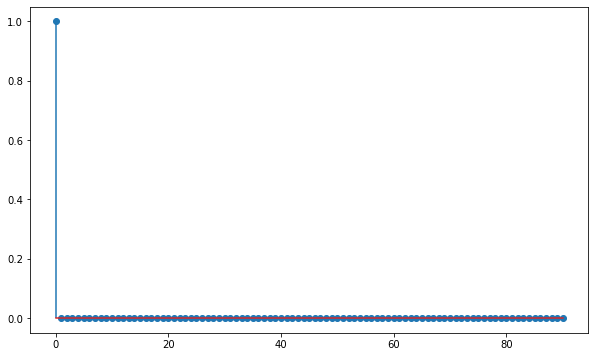

In [18]:
plt.figure(figsize=(10,6))
plt.stem(DS['zmean'])

In [19]:
DS['wmean']

array([1.01735046, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Equation discovery drift 3

In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0.1, 0, 0.01, 0,0.01, 0, 0.01, 0,0.01, 0, 0.01, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [8]:
xdts = xdrift3
Dict = D.reshape(-1,order='F')

In [10]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[13.0],[16.0],[20.0],[24.0],[34.0],[38.0],[49.0],[64.0],[67.0]]), 'Value': matlab.double([[1992.0763608965274],[2.0020370428524976],[-4487.696073025232],[-3.8891593867982173],[2484.52815554667],[1.9117356803567815],[0.007589196081813914],[-237.31734959960664],[-165.6714328206505],[149.2427473695229],[-0.011873472587586304],[1.7403911248466446],[-0.08955209461275652],[0.04824774303544217],[-3.6003173419504466]])}


In [11]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    

initz0_1 = np.zeros(D.shape[1])

a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))

for i in b:
    initz0_1[i] = 1
    

D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)

D1 = D*np.diag(1/D_std1)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code_drift(X, y, initz0, tol, verbosity)
print(DS)

1994.3986525500131
1.9682937664465814
-4493.280680342166
-3.913906279209749
2488.4558806244054
1.9025726523843176


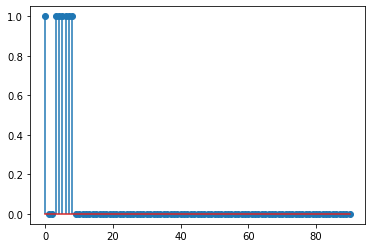

In [13]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])
    

# Equation discovery diffusion 3

In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [ ]:
xdts = xdiff33
Dict = D.reshape(-1,order='F')

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[2.0],[3.0],[4.0],[9.0],[12.0],[13.0],[16.0],[28.0],[32.0],[40.0],[46.0],[49.0],[50.0],[51.0],[54.0],[56.0],[57.0],[64.0],[66.0],[68.0],[71.0],[73.0],[76.0],[77.0],[82.0],[85.0],[86.0]]), 'Value': matlab.double([[0.8148623623493689],[-109.97007639997933],[-2.384551116790666],[139.0224137511117],[-1.045068509813222],[-24.02623813769329],[1.141736279132835],[-3385.2991892197424],[-2.104178518873701],[2.1856694468251026],[-9.567413983812257],[-96.97453557765694],[2.9141028303750653],[-49.76757094416334],[1.1162893580671156],[107.02803531203845],[3810.4523707439075],[76.87503102852342],[0.5795970164035344],[5.738442798932592],[0.7076450060953421],[7096.617301824366],[-13737.451914606063],[47.37391011042779],[1.3186219742572294],[4506.8221289925405],[71.89182279102853],[1.2495463641210733]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0_1
DS = Variational_Bayes_Code_diff(D, xdts, initz0, tol, verbosity)

In [17]:
mut1 = DS['wmean']
sigt = DS['wCOV']
DS['zmean'][np.where(DS['zmean']<0.5)] = 0
mut1[np.where(DS['zmean']<0.5)] = 0
DS['zmean'][np.where(np.diag(sigt)>0.01)] = 0
mut1[np.where(np.diag(sigt)>0.01)] = 0

<StemContainer object of 3 artists>

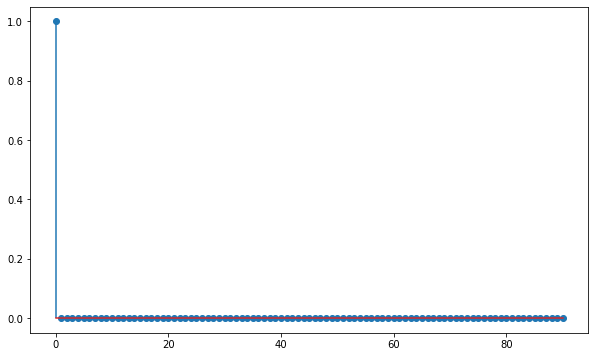

In [18]:
plt.figure(figsize=(10,6))
plt.stem(DS['zmean'])

In [19]:
DS['wmean']

array([0.9313068, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

In [ ]:
np.diag(DS['wCOV'])

# Equation discovery drift 4

In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0.5, 0, 0.01, 0,0.01, 0, 0.01, 0,0.01, 0, 0.01, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [9]:
Dict = D.reshape(-1,order='F')
xdts = xdrift4

#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[6.0],[7.0],[8.0],[9.0],[10.0],[11.0],[26.0],[34.0],[50.0],[58.0],[69.0]]), 'Value': matlab.double([[0.5542919172968264],[2499.986732678151],[2.0123348778051438],[-5501.02315776044],[-4.002569041763222],[3001.3403871384467],[2.014513027782432],[0.00029886380721690585],[-0.0026208469950670006],[0.16769810902693252],[-9.572335591386437],[-0.12779753787582745]])}


In [10]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    

initz0_1 = np.zeros(D.shape[1])

a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))

for i in b:
    initz0_1[i] = 1

D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)

D1 = D*np.diag(1/D_std1)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code_drift(X, y, initz0, tol, verbosity)
print(DS)

2498.295984321392
2.0128810316628214
-5500.365293806219
-4.0120664937724175
2998.0262031975667
2.0425105954050977


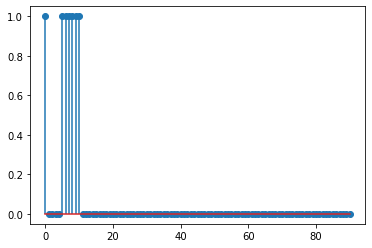

In [12]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])
    

# Equation discovery diffusion 4

In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [ ]:
xdts = xdiff44
Dict = D.reshape(-1,order='F')

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[2.0],[9.0],[11.0],[12.0],[13.0],[17.0],[19.0],[21.0],[23.0],[44.0],[51.0],[61.0],[65.0],[67.0],[74.0],[78.0],[79.0],[80.0],[81.0],[86.0],[88.0]]), 'Value': matlab.double([[0.8504682614717879],[303.21698121372276],[-1.0282896256966754],[1.2220702270834356],[-64.83257964218386],[4.304219137192417],[-160.89077042355686],[71.9816441172208],[-39.56661643568082],[-211.5742898530713],[86.45984569914738],[7.172157717118596],[-130.3273023769725],[-175.67440017776354],[18.342101432707253],[200.5449467909547],[-303.2293992846905],[0.6503089942713646],[243.53253023524871],[2.875257899207231],[5.095086946467184],[-0.38924783245054784]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0_1
DS = Variational_Bayes_Code_diff(D, xdts, initz0, tol, verbosity) 

In [17]:
mut1 = DS['wmean']
sigt = DS['wCOV']
DS['zmean'][np.where(DS['zmean']<0.5)] = 0
mut1[np.where(DS['zmean']<0.5)] = 0
DS['zmean'][np.where(np.diag(sigt)>0.05)] = 0
mut1[np.where(np.diag(sigt)>0.05)] = 0

In [ ]:
plt.figure(figsize=(10,6))
plt.stem(DS['zmean'])

In [ ]:
np.diag(DS['wCOV'])

In [21]:
np.sqrt(DS['wmean'][0])

0.9897367586609528

# Equation discovery drift 5

In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0.1, 0, 0.01, 0,0.01, 0, 0.01, 0,0.01, 0, 0.01, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [8]:
# Bayesian Interference:
# D, xdts, muD, sdvD = fun_library0.BayInt(D, xdt)
xdts = xdrift5
Dict = D.reshape(-1,order='F')

#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()



{'Relevant': matlab.double([[2.0],[4.0],[8.0],[9.0],[10.0],[11.0],[12.0],[13.0],[24.0],[30.0],[42.0],[47.0],[78.0],[86.0]]), 'Value': matlab.double([[-2.779949801984385],[3.6596586009406646],[3001.09757596732],[2.1850962553212305],[-5996.183661193722],[-3.7606876994546425],[2997.5422350767053],[2.1444201884459226],[-132.6566251102477],[-0.0340386644403345],[-2.5475205749101693],[-0.06096577799751911],[-8.485897018222115],[0.1793299021832957]])}


In [9]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    

initz0_1 = np.zeros(D.shape[1])

a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))

for i in b:
    initz0_1[i] = 1

D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)

D1 = D*np.diag(1/D_std1)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code_drift(X, y, initz0, tol, verbosity)
print(DS)

3000.373170311368
2.1048303373421335
-5995.495819377055
-3.8194925684762455
2999.900440031714
2.0837874724757675


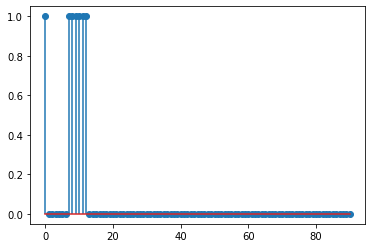

In [11]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])
    

# Equation discovery diffusion 5

In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [ ]:
xdts = xdiff55
Dict = D.reshape(-1,order='F')

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[3.0],[5.0],[6.0],[9.0],[15.0],[16.0],[22.0],[23.0],[30.0],[32.0],[36.0],[38.0],[47.0],[53.0],[54.0],[64.0],[66.0],[70.0],[71.0],[73.0],[74.0],[82.0],[83.0],[86.0],[87.0],[88.0],[91.0]]), 'Value': matlab.double([[1.0494433845143272],[4.686540223026072],[2.9558844544340555],[28.87618509810177],[-0.14754353244545335],[-102.27756274661486],[-19079.666323158744],[19816.84036994562],[-38.44628754228666],[4.657195926818584],[2.1414734270903493],[9.2748872867632],[225.76414004107573],[-1.8217663637518495],[2.947812936869999],[-122.68394279348517],[-7.109306840885126],[-3.131956663066878],[-1.7604528701007796],[32366.6243870996],[-58946.925333404884],[-241.72534717234925],[24929.600052267546],[222.80895143798617],[1.7445755133362997],[-37.084925577079495],[2.582957346254193],[1.0727137087302365]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0_1
DS = Variational_Bayes_Code_diff(D, xdts, initz0, tol, verbosity)

In [17]:
mut1 = DS['wmean']
sigt = DS['wCOV']
DS['zmean'][np.where(DS['zmean']<0.5)] = 0
mut1[np.where(DS['zmean']<0.5)] = 0
DS['zmean'][np.where(np.diag(sigt)>0.05)] = 0
mut1[np.where(np.diag(sigt)>0.05)] = 0

<StemContainer object of 3 artists>

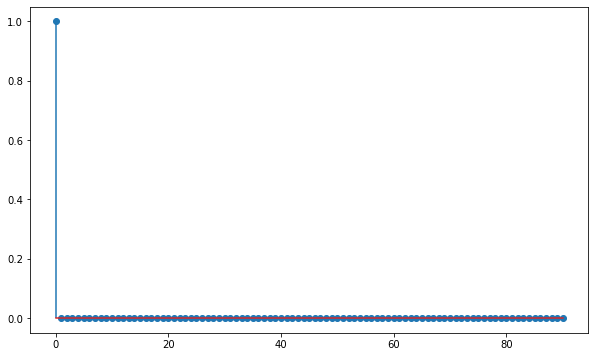

In [18]:
plt.figure(figsize=(10,6))
plt.stem(DS['zmean'])

In [19]:
DS['wmean']

array([1.01961909, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
np.diag(DS['wCOV'])

# Equation discovery drift tuned mass

In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0.1, 0, 0.01, 0,0.01, 0, 0.01, 0,0.01, 0, 0.01, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [8]:
xdts = xdrift6
Dict = D.reshape(-1,order='F')

In [10]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[10.0],[11.0],[12.0],[13.0]]), 'Value': matlab.double([[2999.999989862785],[1.9999954810966447],[-2999.9999908498507],[-1.9999987527737473]])}


In [11]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    

initz0_1 = np.zeros(D.shape[1])

a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))

for i in b:
    initz0_1[i] = 1
    


D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)

D1 = D*np.diag(1/D_std1)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code_drift(X, y, initz0, tol, verbosity)

3000.7314135620236
2.000755723608912
-3000.9212818525352
-2.0005263736894023


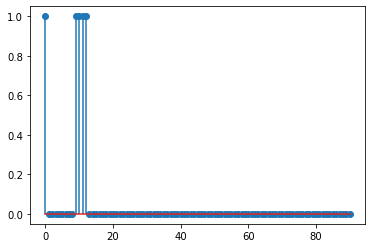

In [13]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])
    

# True value prediction

In [1]:
import numpy as np
import pickle

Nsamp = 10000
dt = 0.0005
T = 30
t = np.arange(0, T+dt, dt)
dW1 = np.sqrt(dt)*np.random.randn(Nsamp, 60001)
dW2 = np.sqrt(dt)*np.random.randn(Nsamp, 60001)
dW3 = np.sqrt(dt)*np.random.randn(Nsamp, 60001)
dW4 = np.sqrt(dt)*np.random.randn(Nsamp, 60001)
dW5 = np.sqrt(dt)*np.random.randn(Nsamp, 60001)
dW6 = np.sqrt(dt)*np.random.randn(Nsamp, 60001)

In [3]:
dW = [dW1, dW2, dW3, dW4, dW5, dW6]
pickle.dump(dW, open('Forcing_term_TMD.p', 'wb'))

In [1]:
import pickle 
import numpy as np

file_data = "Forcing_term_TMD.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
dW1 = dW[0]
dW2 = dW[1]
dW3 = dW[2]
dW4 = dW[3]
dW5 = dW[4]
dW6 = dW[5]

In [4]:
def dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2, T):

    m1,m2,m3,m4,m5,m_d = 10, 10, 10, 10, 10, 1
    k1,k2,k3,k4,k5,k_d = 5000,4000,4000,3000,3000,763.547
    c1,c2,c3,c4,c5,c_d = 20,20,20,20,20,13.816
    sigma1,sigma2,sigma3,sigma4,sigma5 = 1,1,1,1,1
    
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    y9 = []
    y10 = []
    y_d1 = []
    y_d2= []
   
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2])
        x = x0  
        for n in range(len(t)-1):
            
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0] \
                -(c2/m1)*(x0[1]-x0[3])-(k2/m1)*(x0[0]-x0[2])
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0]) \
                -(c3/m2)*(x0[3]-x0[5])-(k3/m2)*(x0[2]-x0[4])
            
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2]) \
                -(c4/m3)*(x0[5]-x0[7])-(k4/m3)*(x0[4]-x0[6])
            
            a7 = x0[7]
            a8 = -(c4/m4)*(x0[7]-x0[5])-(k4/m4)*(x0[6]-x0[4]) \
                -(c5/m4)*(x0[7]-x0[9])-(k5/m4)*(x0[6]-x0[8])
            
            a9 = x0[9]
            a10 = -(c5/m5)*(x0[9]-x0[7])-(k5/m5)*(x0[8]-x0[6]) \
                -(c5/m5)*(x0[9]-x0[11])-(k5/m5)*(x0[8]-x0[10])
            
            a11 = x0[11]
            a12 = -(c_d/m_d)*(x0[11]-x0[9])-(k_d/m_d)*(x0[10]-x0[8])
            


            b1 = 0
            b2 = (sigma1)/m1
            b3 = 0
            b4 = (sigma2)/m2
            b5 = 0
            b6 = (sigma3)/m3
            b7 = 0
            b8 = (sigma4)/m4
            b9 = 0
            b10 = (sigma5)/m5
            b11 = 0
            b12 = 0          
            
            sol1 = x0[0] + a1*dt
            sol2 = x0[1] + a2*dt + b2*dW1[ensemble][n]
            sol3 = x0[2] + a3*dt
            sol4 = x0[3] + a4*dt + b4*dW2[ensemble][n]
            sol5 = x0[4] + a5*dt
            sol6 = x0[5] + a6*dt + b6*dW3[ensemble][n]
            sol7 = x0[6] + a7*dt
            sol8 = x0[7] + a8*dt + b8*dW4[ensemble][n]
            sol9 = x0[8] + a9*dt
            sol10 = x0[9] + a10*dt + b10*dW5[ensemble][n]
            sol11 = x0[10] + a11*dt
            sol12 = x0[11] + a12*dt + b12*dW6[ensemble][n]
            
            x0 = np.array([sol1, sol2, sol3, sol4,sol5, sol6, sol7, sol8,sol9, sol10, sol11, sol12])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        y7.append(x[6,:])
        y8.append(x[7,:])
        y9.append(x[8,:])
        y10.append(x[9,:])
        y_d1.append(x[10,:])
        y_d2.append(x[11,:])
        
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)
    y11 = np.array(y_d1)
    y12 = np.array(y_d2)
    
    return y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y11, y12


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 2

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0  
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2 = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)


In [7]:
output = [y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2]

In [8]:
import pickle 

pickle.dump(output, open('TMD_actual_relia_data_5000.p', 'wb'))

In [ ]:
import pickle 
import numpy as np

file_data = "Forcing_term_TMD.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

dW1 = dW[0]
dW2 = dW[1]
dW3 = dW[2]
dW4 = dW[3]
dW5 = dW[4]
dW6 = dW[5]

import numpy as np
import matplotlib.pyplot as plt

T = 2

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0  
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2 = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

output = [y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2]

import pickle 

pickle.dump(output, open('TMD_actual_relia_data_5000.p', 'wb'))

# Estimated value prediction

In [1]:
import pickle 
import numpy as np

file_data = "Forcing_term_TMD.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
dW1 = dW[0]
dW2 = dW[1]
dW3 = dW[2]
dW4 = dW[3]
dW5 = dW[4]
dW6 = dW[5]

In [4]:
def dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2, T):

    m1,m2,m3,m4,m5,m_d = 10, 10, 10, 10, 10, 1
    k1,k2,k3,k4,k5,k_d = 5004,4000.5,4001.3,3002.14,2992.4,762.87
    c1,c2,c3,c4,c5,c_d = 19.81,20.18,20.007,20.2,20.3,13.817
    sigma1,sigma2,sigma3,sigma4,sigma5 = 1.027,1.044,1.031,1.017,1.008
    
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 5000 
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    y9 = []
    y10 = []
    y_d1 = []
    y_d2= []
   
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2])
        x = x0  
        for n in range(len(t)-1):
            
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0] \
                -(c2/m1)*(x0[1]-x0[3])-(k2/m1)*(x0[0]-x0[2])
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0]) \
                -(c3/m2)*(x0[3]-x0[5])-(k3/m2)*(x0[2]-x0[4])
            
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2]) \
                -(c4/m3)*(x0[5]-x0[7])-(k4/m3)*(x0[4]-x0[6])
            
            a7 = x0[7]
            a8 = -(c4/m4)*(x0[7]-x0[5])-(k4/m4)*(x0[6]-x0[4]) \
                -(c5/m4)*(x0[7]-x0[9])-(k5/m4)*(x0[6]-x0[8])
            
            a9 = x0[9]
            a10 = -(c5/m5)*(x0[9]-x0[7])-(k5/m5)*(x0[8]-x0[6]) \
                -(c5/m5)*(x0[9]-x0[11])-(k5/m5)*(x0[8]-x0[10])
            
            a11 = x0[11]
            a12 = -(c_d/m_d)*(x0[11]-x0[9])-(k_d/m_d)*(x0[10]-x0[8])
            


            b1 = 0
            b2 = (sigma1)/m1
            b3 = 0
            b4 = (sigma2)/m2
            b5 = 0
            b6 = (sigma3)/m3
            b7 = 0
            b8 = (sigma4)/m4
            b9 = 0
            b10 = (sigma5)/m5
            b11 = 0
            b12 = 0          
            
            sol1 = x0[0] + a1*dt
            sol2 = x0[1] + a2*dt + b2*dW1[ensemble][n]
            sol3 = x0[2] + a3*dt
            sol4 = x0[3] + a4*dt + b4*dW2[ensemble][n]
            sol5 = x0[4] + a5*dt
            sol6 = x0[5] + a6*dt + b6*dW3[ensemble][n]
            sol7 = x0[6] + a7*dt
            sol8 = x0[7] + a8*dt + b8*dW4[ensemble][n]
            sol9 = x0[8] + a9*dt
            sol10 = x0[9] + a10*dt + b10*dW5[ensemble][n]
            sol11 = x0[10] + a11*dt
            sol12 = x0[11] + a12*dt + b12*dW6[ensemble][n]
            
            x0 = np.array([sol1, sol2, sol3, sol4,sol5, sol6, sol7, sol8,sol9, sol10, sol11, sol12])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        y7.append(x[6,:])
        y8.append(x[7,:])
        y9.append(x[8,:])
        y10.append(x[9,:])
        y_d1.append(x[10,:])
        y_d2.append(x[11,:])
        
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)
    y11 = np.array(y_d1)
    y12 = np.array(y_d2)
    
    return y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y11, y12


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 30

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0  
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2 = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)


In [7]:
output = [y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2]

In [8]:
import pickle 

pickle.dump(output, open('TMD_Final_relia_data_5000.p', 'wb'))

In [1]:
import pickle 
import numpy as np

file_data = "Forcing_term_TMD.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
dW1 = dW[0]
dW2 = dW[1]
dW3 = dW[2]
dW4 = dW[3]
dW5 = dW[4]
dW6 = dW[5]

In [4]:
def dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2, T):

    m1,m2,m3,m4,m5,m_d = 10, 10, 10, 10, 10, 1
    k1,k2,k3,k4,k5,k_d = 5004,4000.5,4001.3,3002.14,2992.4,762.87
    c1,c2,c3,c4,c5,c_d = 19.81,20.18,20.007,20.2,20.3,13.817
    sigma1,sigma2,sigma3,sigma4,sigma5 = 1.027,1.044,1.031,1.017,1.008
    
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 5000
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    y9 = []
    y10 = []
    y_d1 = []
    y_d2= []
   
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2])
        x = x0  
        for n in range(len(t)-1):
            
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0] \
                -(c2/m1)*(x0[1]-x0[3])-(k2/m1)*(x0[0]-x0[2])
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0]) \
                -(c3/m2)*(x0[3]-x0[5])-(k3/m2)*(x0[2]-x0[4])
            
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2]) \
                -(c4/m3)*(x0[5]-x0[7])-(k4/m3)*(x0[4]-x0[6])
            
            a7 = x0[7]
            a8 = -(c4/m4)*(x0[7]-x0[5])-(k4/m4)*(x0[6]-x0[4]) \
                -(c5/m4)*(x0[7]-x0[9])-(k5/m4)*(x0[6]-x0[8])
            
            a9 = x0[9]
            a10 = -(c5/m5)*(x0[9]-x0[7])-(k5/m5)*(x0[8]-x0[6]) \
                -(c5/m5)*(x0[9]-x0[11])-(k5/m5)*(x0[8]-x0[10])
            
            a11 = x0[11]
            a12 = -(c_d/m_d)*(x0[11]-x0[9])-(k_d/m_d)*(x0[10]-x0[8])
            


            b1 = 0
            b2 = (sigma1)/m1
            b3 = 0
            b4 = (sigma2)/m2
            b5 = 0
            b6 = (sigma3)/m3
            b7 = 0
            b8 = (sigma4)/m4
            b9 = 0
            b10 = (sigma5)/m5
            b11 = 0
            b12 = 0          
            
            sol1 = x0[0] + a1*dt
            sol2 = x0[1] + a2*dt + b2*dW1[5000+ensemble][n]
            sol3 = x0[2] + a3*dt
            sol4 = x0[3] + a4*dt + b4*dW2[5000+ensemble][n]
            sol5 = x0[4] + a5*dt
            sol6 = x0[5] + a6*dt + b6*dW3[5000+ensemble][n]
            sol7 = x0[6] + a7*dt
            sol8 = x0[7] + a8*dt + b8*dW4[5000+ensemble][n]
            sol9 = x0[8] + a9*dt
            sol10 = x0[9] + a10*dt + b10*dW5[5000+ensemble][n]
            sol11 = x0[10] + a11*dt
            sol12 = x0[11] + a12*dt + b12*dW6[5000+ensemble][n]
            
            x0 = np.array([sol1, sol2, sol3, sol4,sol5, sol6, sol7, sol8,sol9, sol10, sol11, sol12])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        y7.append(x[6,:])
        y8.append(x[7,:])
        y9.append(x[8,:])
        y10.append(x[9,:])
        y_d1.append(x[10,:])
        y_d2.append(x[11,:])
        
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)
    y11 = np.array(y_d1)
    y12 = np.array(y_d2)
    
    return y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y11, y12


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 30

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0  
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2 = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)


In [8]:
output = [y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2]

In [9]:
import pickle 

pickle.dump(output, open('TMD_Final_relia_data_5000_to_10000.p', 'wb'))

In [ ]:
import pickle 
import numpy as np

file_data = "Forcing_term_TMD.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

dW1 = dW[0]
dW2 = dW[1]
dW3 = dW[2]
dW4 = dW[3]
dW5 = dW[4]
dW6 = dW[5]

def dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2, T):

    m1,m2,m3,m4,m5,m_d = 10, 10, 10, 10, 10, 1
    k1,k2,k3,k4,k5,k_d = 5004,4000.5,4001.3,3002.14,2992.4,762.87
    c1,c2,c3,c4,c5,c_d = 19.81,20.18,20.007,20.2,20.3,13.817
    sigma1,sigma2,sigma3,sigma4,sigma5 = 1.027,1.044,1.031,1.017,1.008
    
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 5000
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    y9 = []
    y10 = []
    y_d1 = []
    y_d2= []
   
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2])
        x = x0  
        for n in range(len(t)-1):
            
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0] \
                -(c2/m1)*(x0[1]-x0[3])-(k2/m1)*(x0[0]-x0[2])
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0]) \
                -(c3/m2)*(x0[3]-x0[5])-(k3/m2)*(x0[2]-x0[4])
            
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2]) \
                -(c4/m3)*(x0[5]-x0[7])-(k4/m3)*(x0[4]-x0[6])
            
            a7 = x0[7]
            a8 = -(c4/m4)*(x0[7]-x0[5])-(k4/m4)*(x0[6]-x0[4]) \
                -(c5/m4)*(x0[7]-x0[9])-(k5/m4)*(x0[6]-x0[8])
            
            a9 = x0[9]
            a10 = -(c5/m5)*(x0[9]-x0[7])-(k5/m5)*(x0[8]-x0[6]) \
                -(c5/m5)*(x0[9]-x0[11])-(k5/m5)*(x0[8]-x0[10])
            
            a11 = x0[11]
            a12 = -(c_d/m_d)*(x0[11]-x0[9])-(k_d/m_d)*(x0[10]-x0[8])
            


            b1 = 0
            b2 = (sigma1)/m1
            b3 = 0
            b4 = (sigma2)/m2
            b5 = 0
            b6 = (sigma3)/m3
            b7 = 0
            b8 = (sigma4)/m4
            b9 = 0
            b10 = (sigma5)/m5
            b11 = 0
            b12 = 0          
            
            sol1 = x0[0] + a1*dt
            sol2 = x0[1] + a2*dt + b2*dW1[5000+ensemble][n]
            sol3 = x0[2] + a3*dt
            sol4 = x0[3] + a4*dt + b4*dW2[5000+ensemble][n]
            sol5 = x0[4] + a5*dt
            sol6 = x0[5] + a6*dt + b6*dW3[5000+ensemble][n]
            sol7 = x0[6] + a7*dt
            sol8 = x0[7] + a8*dt + b8*dW4[5000+ensemble][n]
            sol9 = x0[8] + a9*dt
            sol10 = x0[9] + a10*dt + b10*dW5[5000+ensemble][n]
            sol11 = x0[10] + a11*dt
            sol12 = x0[11] + a12*dt + b12*dW6[5000+ensemble][n]
            
            x0 = np.array([sol1, sol2, sol3, sol4,sol5, sol6, sol7, sol8,sol9, sol10, sol11, sol12])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        y7.append(x[6,:])
        y8.append(x[7,:])
        y9.append(x[8,:])
        y10.append(x[9,:])
        y_d1.append(x[10,:])
        y_d2.append(x[11,:])
        
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)
    y11 = np.array(y_d1)
    y12 = np.array(y_d2)
    
    return y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y11, y12


import numpy as np
import matplotlib.pyplot as plt

T = 30

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0  
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2 = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)




output = [y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2]

import pickle 

pickle.dump(output, open('TMD_Final_relia_data_5000_to_10000.p', 'wb'))

# Reliability

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
actual_1 = "TMD_actual_relia_data_5000.p"
file_actual_1 = open(actual_1, 'rb')
file_obj_actual_1 = pickle.load(file_actual_1)
actual_1 = np.array(file_obj_actual_1)

actual_2 = "TMD_actual_relia_data_5000_to_10000.p"
file_actual_2 = open(actual_2, 'rb')
file_obj_actual_2 = pickle.load(file_actual_2)
actual_2 = np.array(file_obj_actual_2)

In [ ]:
y11 = actual_1[0]
y12 = actual_2[0]
y9_1 = actual_1[8]
y9_2 = actual_2[8]
y9 = np.vstack((y9_1, y9_2))

In [9]:
a = np.linspace(0,30,60001)

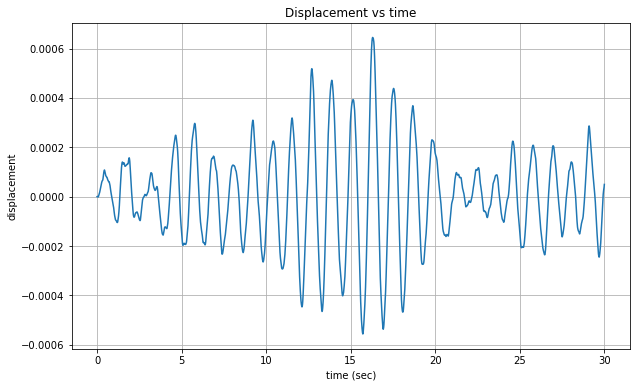

In [10]:
plt.figure(figsize=(10,6))
plt.xlim()
plt.plot(a,np.mean(y9, axis=0))
plt.title('Displacement vs time')
plt.xlabel('time (sec)')
plt.ylabel('displacement')
plt.grid()
plt.savefig('states_tmd.pdf')
plt.show()


In [ ]:
idx = [np.where(y9[i,:]>0.0614) for i in range(10000)]

count = 0
for i in idx:
    if len(i[0])!=0:
        count += 1
        
print("Probabilty of Failure :", count/len(idx))

ans = []
for i in idx:
    if len(i[0])!=0:
        ans.append((i[0][0])/2000)
    else:
        ans.append(60000/2000)


pf_count_per_t = set()
prob_fail = []
for i in range(60001):
    colmn = y9[:,i]
    ans = np.where(colmn>0.0614)
    for i in ans[0]:
        pf_count_per_t.add(i)
        
    no_of_fail = len(pf_count_per_t)
    prob_fail.append(no_of_fail/10000)
    
final_ans = []
for i in range(len(prob_fail)):
    if i%2000 == 0:
        final_ans.append(prob_fail[i])

In [ ]:
final_1 = "TMD_Final_relia_data_5000.p"
file_final_1 = open(final_1, 'rb')
file_obj_final_1 = pickle.load(file_final_1)
final_1 = np.array(file_obj_final_1)
final_2 = "TMD_Final_relia_data_5000_to_10000.p"
file_final_2 = open(final_2, 'rb')
file_obj_final_2 = pickle.load(file_final_2)
final_2 = np.array(file_obj_final_2)

In [15]:
y9_1_f = final_1[8]
y9_2_f = final_2[8]
y9_f = np.vstack((y9_1_f, y9_2_f))

In [ ]:
idx_f = [np.where(y9_f[i,:]>0.0614) for i in range(10000)]
count_f = 0
for i in idx_f:
    if len(i[0])!=0:
        count_f += 1
        
print("Probabilty of Failure :", count_f/len(idx_f))

ans_f = []
for i in idx_f:
    if len(i[0])!=0:
        ans_f.append((i[0][0])/2000)
    else:
        ans_f.append(60000/2000)

pf_count_per_t_f = set()
prob_fail_f = []
for i in range(60001):
    colmn = y9_f[:,i]
    ans = np.where(colmn>0.0614)
    for i in ans[0]:
        pf_count_per_t_f.add(i)
        
    no_of_fail_f = len(pf_count_per_t_f)
    prob_fail_f.append(no_of_fail_f/10000)
    
final_ans_f = []
for i in range(len(prob_fail_f)):
    if i%2000 == 0:
        final_ans_f.append(prob_fail_f[i])
    

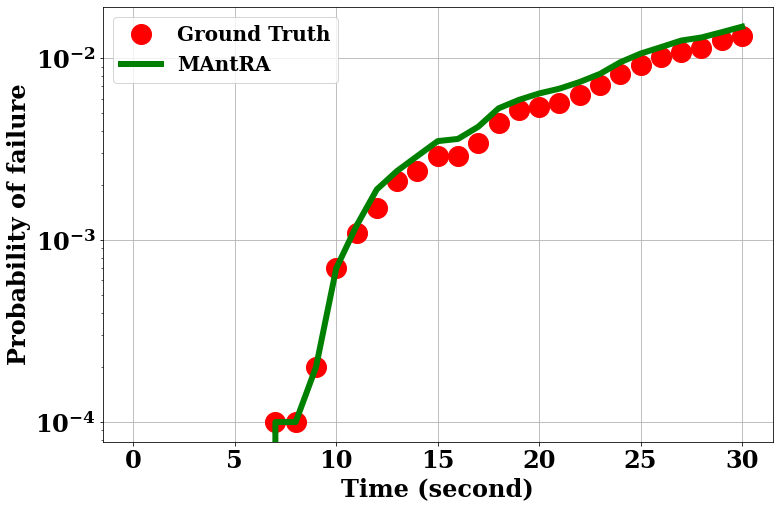

In [48]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 24
plt.figure(figsize = (12,8 ))
plt.semilogy(final_ans, 'ro', label="Ground Truth", markersize=20)
plt.semilogy(final_ans_f,color='green' ,linewidth=6, label="MAntRA")
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Probability of failure',fontweight='bold')
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.legend(prop={'weight':'bold','size': 20},loc=2)
plt.grid()
plt.savefig('reliability tmd.pdf')
plt.show()